In [142]:
# Import packages
 # import fuzzywizzy?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymongo
import string
import nltk
import re
import os
import sys
import pandas_profiling as pp
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


src_dir = os.path.join(os.getcwd(), '..', '..', 'src')
sys.path.append(src_dir)

# helper functions
from d02_processing.cleaning_signatures import clean_signatures, 

# Load the "autoreload" extension
%load_ext autoreload

# reload modules so that as you change code in src, it gets loaded
%autoreload

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
# open up a mongo cursor and query the db for all the signatures and return a list of unique signatures

# create cursor
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
curlydb = myclient['Naturaly_Curly_db']
curly_collection = curlydb['curly_profiles']

# Access all the unique items and store them to a list
query_1 = curly_collection.find({})
test = []
for x in query_1:
    test.append(x['signature'])

# This is the number of total unique entire in the database
unique_sigs = list(set(test))
print(len(unique_sigs))

7961


In [144]:
raw_characteristics_df = clean_signatures(unique_sigs)
raw_characteristics_df.head(20)

,curl_pattern,density,porosity,texture,products
0,NaN,NaN,NaN,NaN,
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
5,NaN,NaN,NaN,NaN,youtube com smartblackchic
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
8,NaN,NaN,NaN,NaN,rockin to the tune of her own beat
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...


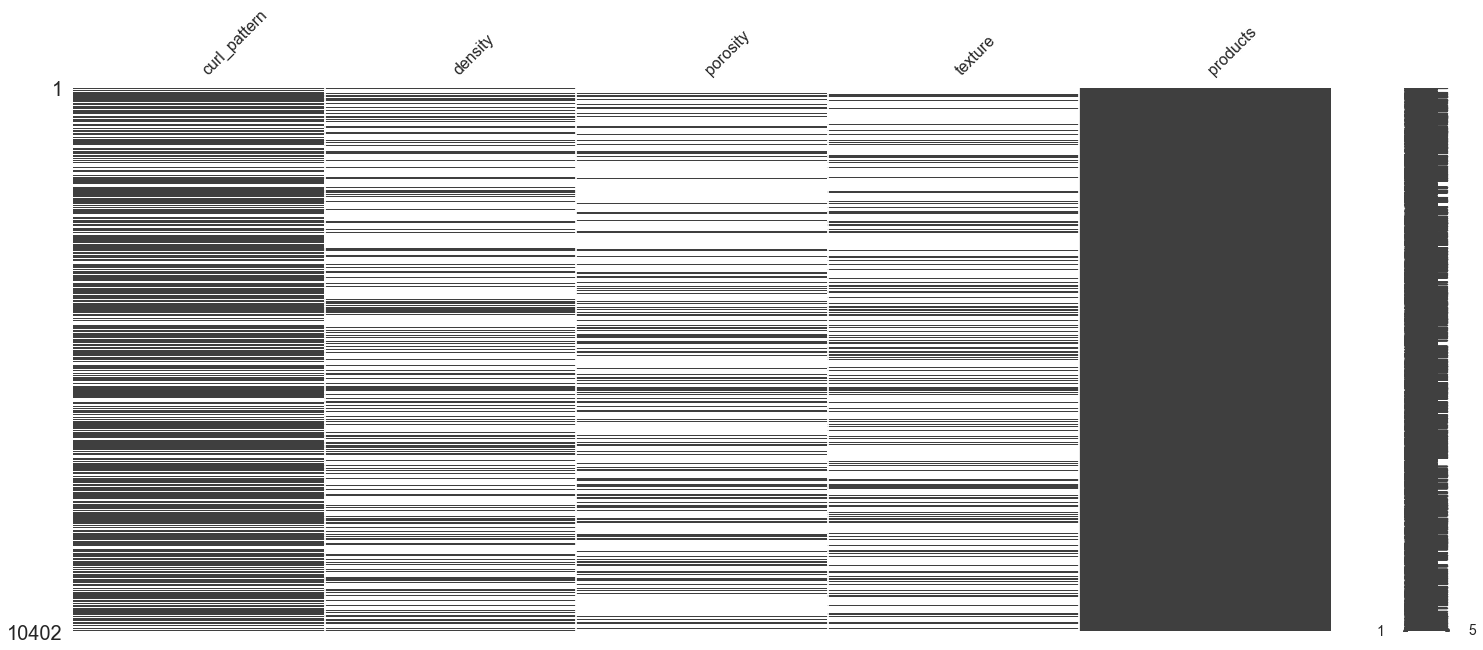

In [145]:
msno.matrix(raw_characteristics_df)

In [146]:
raw_characteristics_df.count()

curl_pattern     7423
density          3031
porosity         2604
texture          2717
products        10402
dtype: int64

In [194]:
all_nan_dropped_df = raw_characteristics_df.dropna(axis=0, how='all', subset=['curl_pattern', 'density', 'porosity', 'texture'], inplace=False)
all_nan_dropped_df.head(10)

,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
11,3a,NaN,NaN,fine,type highly porous though much better after qu...
13,2b,NaN,low,fine,and coils at the ends and underlayer dense hi...


In [148]:
all_nan_dropped_df.curl_pattern.isnull()

1        False
2         True
3        False
4        False
6         True
7         True
9        False
10       False
11       False
13       False
14       False
15       False
16       False
18       False
19       False
20       False
23       False
24        True
25       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
44       False
         ...  
10362    False
10363    False
10366    False
10368     True
10369    False
10371    False
10372    False
10374    False
10375    False
10376     True
10377    False
10378    False
10379    False
10380    False
10381    False
10382    False
10383    False
10384     True
10385    False
10388    False
10390    False
10391    False
10392    False
10393    False
10394    False
10395    False
10396    False
10397     True
10400    False
10401    False
Name: curl_pattern, Length: 7961, dtype: bool

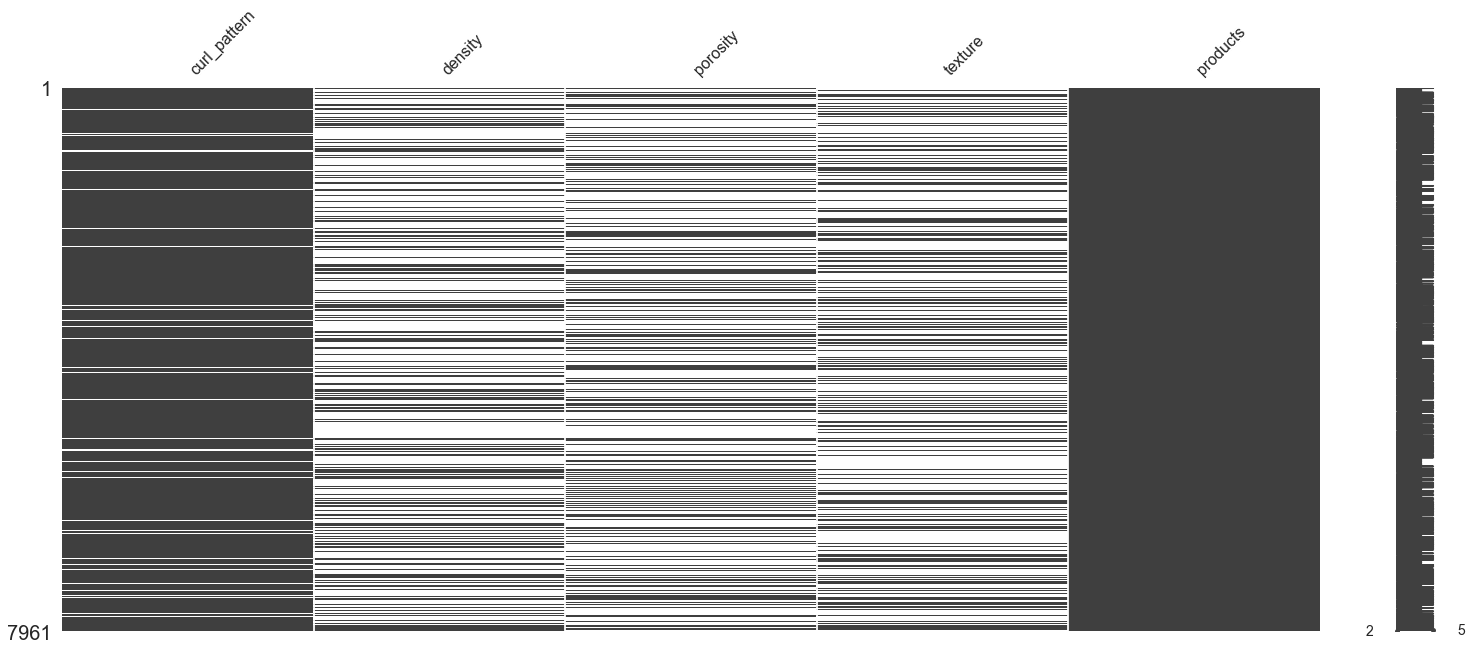

In [149]:
msno.matrix(all_nan_dropped_df)

In [150]:
# check to see what the data frame looks like with a complete set  of characteristics, but its not complete becasue we need to sort out non acceptable values like 'ish'
no_nan_df = raw_characteristics_df.dropna(how='any')
no_nan_df.head(20)

,curl_pattern,density,porosity,texture,products
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
98,3a,medium,high,fine,bleached jaw legnth inverted bob cowash suav...
99,2c,medium,high,fine,bleached jaw legnth inverted bob cowash suav...
112,2c,curls,low,medium,whirly experimenting as usual i ve found that...
135,2c,low,ish,,since september 2011 type normal to co wash o...
136,3a,low,ish,,since september 2011 type normal to co wash o...
138,2a,thin,average,medium,since 5 18 10 canopy underneath low still lear...
139,3a,thin,average,medium,since 5 18 10 canopy underneath low still lear...
162,2b,medium,low,fine,my guess at my hair mix of above shoulder le...


In [151]:
all_nan_dropped_df.curl_pattern.unique()

array(['3b', nan, '3c', '4c', '2c', '3a', '2b', '0b', '4a', '2a', '4b',
       '1c', '5b', '1b', '0a', '5a', '8b', '7c', '0c', '7a', '5c', '6a',
       '1a'], dtype=object)

In [195]:
all_nan_dropped_df.loc[(all_nan_dropped_df.curl_pattern != '2a') & (all_nan_dropped_df.curl_pattern != '2b') & (all_nan_dropped_df.curl_pattern != '2c') & 
                       (all_nan_dropped_df.curl_pattern != '3a') & (all_nan_dropped_df.curl_pattern != '3b') & (all_nan_dropped_df.curl_pattern != '3c') & 
                       (all_nan_dropped_df.curl_pattern != '4a') & (all_nan_dropped_df.curl_pattern != '4b') & (all_nan_dropped_df.curl_pattern != '4c') &
                       (all_nan_dropped_df.curl_pattern != '1c'), 'curl_pattern'] = np.nan
print(all_nan_dropped_df.curl_pattern.unique())
all_nan_dropped_df.head(10)


['3b' nan '3c' '4c' '2c' '3a' '2b' '4a' '2a' '4b' '1c']


,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
11,3a,NaN,NaN,fine,type highly porous though much better after qu...
13,2b,NaN,low,fine,and coils at the ends and underlayer dense hi...


In [153]:
# How much of this do I want to get rid of, should I try to slavage thick natural,wiry
# but I will fix spelling of course to coarse and change normal to medium,
all_nan_dropped_df.texture.value_counts()

fine          1795
medium         443
course          93
coarse          73
                71
hair            42
normal          14
natural          8
multi            8
beautiful        7
thick            7
high             7
think            6
type             5
porosity         4
b                4
wiry             4
density          4
low              4
wavy             3
curls            3
thickness        3
ish              3
two              3
kinky            3
the              3
2010             3
a                3
mixed            3
and              3
              ... 
clairol          2
sigpic           1
soft             1
mzmorenaza       1
signature        1
porous           1
pattern          1
silky            1
back             1
quot             1
mint             1
bb               1
or               1
www              1
average          1
it               1
prone            1
my               1
weightless       1
2                1
same             1
length      

In [196]:
all_nan_dropped_df.loc[all_nan_dropped_df.texture == 'normal', 'texture'] = 'medium'
all_nan_dropped_df.loc[all_nan_dropped_df.texture == 'course', 'texture'] = 'coarse'
all_nan_dropped_df.head(10)

,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
11,3a,NaN,NaN,fine,type highly porous though much better after qu...
13,2b,NaN,low,fine,and coils at the ends and underlayer dense hi...


In [199]:
all_nan_dropped_df.loc[(all_nan_dropped_df.texture != 'medium') & (all_nan_dropped_df.texture != 'fine') & (all_nan_dropped_df.texture != 'coarse'), 'texture'] = np.nan
print(all_nan_dropped_df.texture.unique())
all_nan_dropped_df.head(10)

[nan 'fine' 'medium' 'coarse']


,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
11,3a,NaN,NaN,fine,type highly porous though much better after qu...
13,2b,NaN,low,fine,and coils at the ends and underlayer dense hi...


In [198]:
# too much info to loose here high density needs to be changed to thick and low to thin and normal to medium
all_nan_dropped_df.density.value_counts()

thin               1128
thick               773
high                400
medium              393
low                 155
normal               36
                     19
hair                 12
and                  12
fine                 11
coarse                7
in                    4
elasticity            4
type                  3
width                 3
think                 3
ish                   3
iii                   3
norm                  2
floated               2
abundant              2
about                 2
dye                   2
some                  2
face                  2
both                  2
curls                 2
else                  2
smilebox              2
currently             2
shoulders             2
wave                  2
pattern               2
average               2
texture               2
s                     2
prone                 2
com                   2
fractal               2
psoriasismedium       2
yet                   2
head            

In [200]:
all_nan_dropped_df.loc[all_nan_dropped_df.density == 'normal', 'density'] = 'medium'
all_nan_dropped_df.loc[all_nan_dropped_df.density == 'high', 'density'] = 'thick'
all_nan_dropped_df.loc[all_nan_dropped_df.density == 'low', 'density'] = 'thin'
all_nan_dropped_df.head(10)

,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
11,3a,NaN,NaN,fine,type highly porous though much better after qu...
13,2b,NaN,low,fine,and coils at the ends and underlayer dense hi...


In [201]:
all_nan_dropped_df.loc[(all_nan_dropped_df.density != 'medium') & (all_nan_dropped_df.density != 'thin') & (all_nan_dropped_df.density != 'thick'), 'density'] = np.nan
print(all_nan_dropped_df.density.unique())
all_nan_dropped_df.head(10)

[nan 'thin' 'medium' 'thick']


,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
11,3a,NaN,NaN,fine,type highly porous though much better after qu...
13,2b,NaN,low,fine,and coils at the ends and underlayer dense hi...


In [159]:
# this is definitly not perfect I am loosing a lot of data because of uneven order
all_nan_dropped_df.porosity.value_counts()

low           584
high          460
normal        433
thick         388
medium        322
thin          156
coarse        101
fine           23
average        21
type           19
about          11
hair           11
                9
and             8
density         8
elasticity      7
mixed           6
iii             6
of              6
pattern         6
3b              6
the             5
ish             4
norm            4
out             4
m               3
11              3
my              3
on              3
think           3
             ... 
between         2
tendency        2
long            2
it              2
s               2
cottony         2
inhigh          2
ii              2
go              1
volume          1
twirls          1
lowish          1
elucence        1
quot            1
hiiiigh         1
un              1
roux            1
c               1
curls           1
strands         1
in              1
4               1
regular         1
finding         1
know      

In [202]:
all_nan_dropped_df.loc[all_nan_dropped_df.porosity == 'medium', 'porosity'] = 'normal'
all_nan_dropped_df.loc[all_nan_dropped_df.porosity == 'average', 'porosity'] = 'normal'
all_nan_dropped_df.head(10)

,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
9,2c,thin,normal,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,normal,fine,dormroomcurly blogspot com twitter com dormroo...
11,3a,NaN,NaN,fine,type highly porous though much better after qu...
13,2b,NaN,low,fine,and coils at the ends and underlayer dense hi...


In [203]:
all_nan_dropped_df.loc[(all_nan_dropped_df.porosity != 'normal') & (all_nan_dropped_df.porosity != 'high') & (all_nan_dropped_df.porosity != 'low'), 'porosity'] = np.nan
print(all_nan_dropped_df.porosity.unique())
all_nan_dropped_df.head()

[nan 'normal' 'low' 'high']


,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...


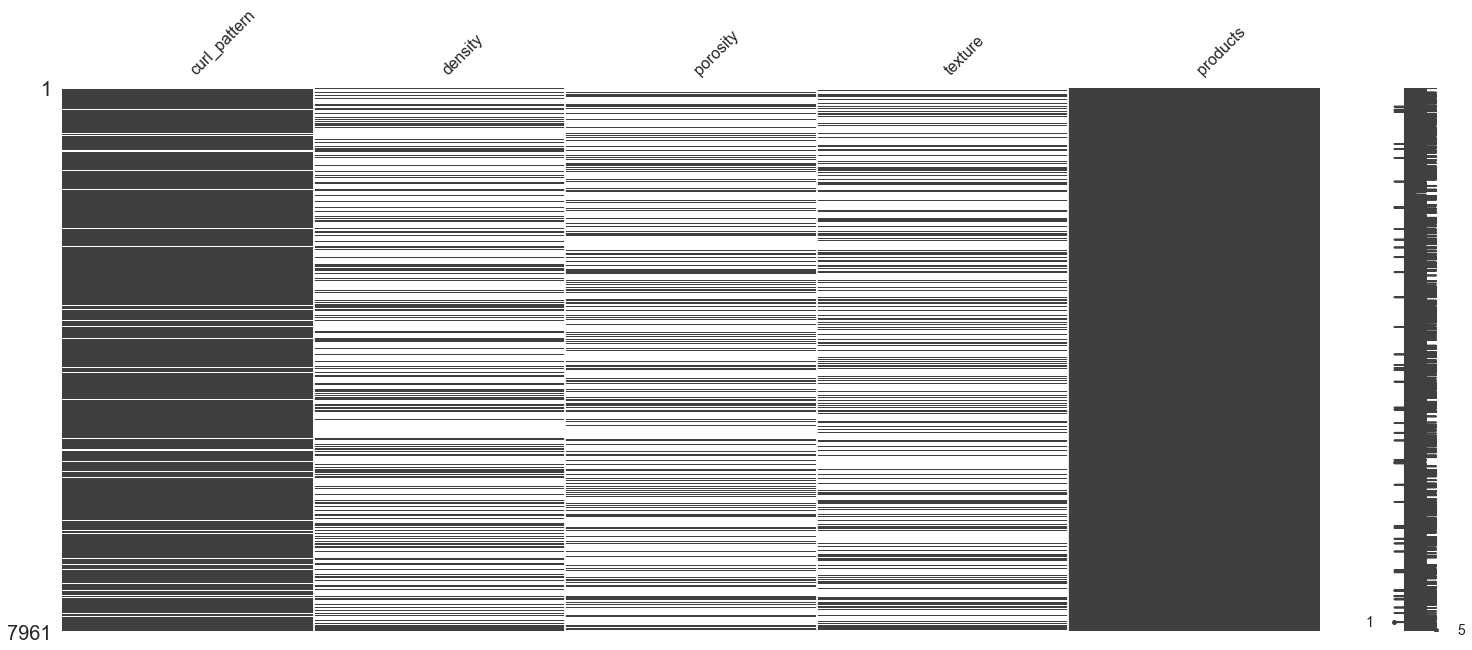

In [204]:
msno.matrix(all_nan_dropped_df)

In [205]:
all_nan_dropped_df.describe()

,curl_pattern,density,porosity,texture,products
count,7405,2885,2278,2418,7961
unique,10,3,3,3,5397
top,3a,thin,normal,fine,
freq,2019,1283,884,1795,56


In [206]:
all_nan_dropped_df.head(30)

,curl_pattern,density,porosity,texture,products
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
6,NaN,NaN,NaN,fine,hair lots of hair mainly variations of 2 fia n...
7,NaN,medium,normal,fine,strands products cowash giovanni tea tree tri...
9,2c,thin,normal,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,normal,fine,dormroomcurly blogspot com twitter com dormroo...
11,3a,NaN,NaN,fine,type highly porous though much better after qu...
13,2b,NaN,low,fine,and coils at the ends and underlayer dense hi...


In [207]:
full_sets_only_df = all_nan_dropped_df.dropna(how='any')
full_sets_only_df.head(20)

,curl_pattern,density,porosity,texture,products
9,2c,thin,normal,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,normal,fine,dormroomcurly blogspot com twitter com dormroo...
98,3a,medium,high,fine,bleached jaw legnth inverted bob cowash suav...
99,2c,medium,high,fine,bleached jaw legnth inverted bob cowash suav...
138,2a,thin,normal,medium,since 5 18 10 canopy underneath low still lear...
139,3a,thin,normal,medium,since 5 18 10 canopy underneath low still lear...
162,2b,medium,low,fine,my guess at my hair mix of above shoulder le...
163,2c,medium,low,fine,my guess at my hair mix of above shoulder le...
168,3a,medium,low,coarse,b low elasticity just above the shoulders pre...
181,2b,medium,normal,fine,low


In [208]:
full_sets_only_df.describe()

,curl_pattern,density,porosity,texture,products
count,678,678,678,678,678
unique,9,3,3,3,438
top,3a,thick,normal,fine,type with some highlighted nml elasticity rout...
freq,198,255,256,459,4
